# Inferring An Unknown Vector From Noisy Measurements, Sensor Fusion

In [1]:
import numpy as np

In [2]:
# unknown vector x
x = np.array([0.5, 0.5])
x_x, y_x = x.T

num_of_measurements = 10
# covariance of the first set of measurements
sigma_y1 = (0.01 * np.array([[10, 1], [1, 1]])) / num_of_measurements
# covariance of the second set of measurements
sigma_y2 = (0.01 * np.array([[1, 1], [1, 10]])) / num_of_measurements

# the mean and the covariance of the measurement distribution are set
mu_1, sigma_1 = x, sigma_y1
mu_2, sigma_2 = x, sigma_y2 
# the mean is separated to its components
x_mean1, y_mean1 = mu_1.T
x_mean2, y_mean2 = mu_2.T

# multivariate Gaussian vector generator is created
rng = np.random.default_rng(seed=548375)

# generated vectors are separated into their components
measurement_array_1 = rng.multivariate_normal(mean=mu_1, cov=sigma_y1, size=num_of_measurements, check_valid='warn')
x1, y1 = measurement_array_1.T
measurement_array_2 = rng.multivariate_normal(mean=mu_2, cov=sigma_y2, size=num_of_measurements, check_valid='warn')
x2, y2 = measurement_array_2.T

In [3]:
import matplotlib.pyplot as plt

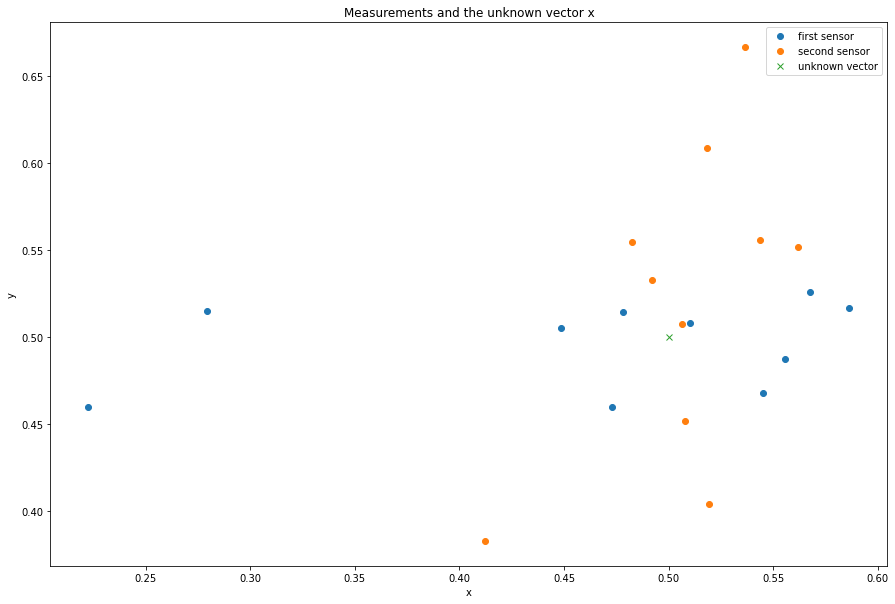

In [4]:
# the measurements and the unknown vector x are plotted
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(x1, y1, 'o', label='first sensor')
_ = ax.plot(x2, y2, 'o', label='second sensor')
_ = ax.plot(x_x, y_x, 'x', label='unknown vector')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Measurements and the unknown vector x')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

In [5]:
import numpy.matlib
from scipy.linalg import block_diag, pinv

In [6]:
# the mean of the measurements from the first sensor
y_bar_1 = measurement_array_1.mean(axis=0)
y_bar_1 = np.expand_dims(y_bar_1, 1)
# the mean of the measurements from the second sensor
y_bar_2 = measurement_array_2.mean(axis=0)
y_bar_2 = np.expand_dims(y_bar_2, 1)

# the mean and the covariance for the prior
mu_x = np.zeros((2, 1))
sigma_x = 1.0e10 * np.eye(2)

sigma_y = block_diag(sigma_1, sigma_2)
# first form of the posterior covariance is computed
cov_post = sigma_x - np.matmul(np.matlib.repmat(sigma_x, 1, 2), np.matmul(pinv(np.matlib.repmat(sigma_x, 2, 2)+sigma_y), np.matlib.repmat(sigma_x, 2, 1)))
print('The first form of the posterior covariance yields the following result:')
print(cov_post)
# second form of the posterior covariance is computed
cov_post = np.linalg.inv(np.linalg.inv(sigma_x) + np.linalg.inv(sigma_1) + np.linalg.inv(sigma_2))
print('The second form of the posterior covariance yields the following result:')
print(cov_post)

The first form of the posterior covariance yields the following result:
[[3849064.66933823 1540628.18182868]
 [-374622.90492836  235728.65757179]]
The second form of the posterior covariance yields the following result:
[[0.00084615 0.00015385]
 [0.00015385 0.00084615]]


The prior covariance causes the inversion operation in the first form of the posterior covariance to be an ill-conditioned operation. Hence, the first posterior covariance result is very different from the second one.

In [7]:
# map estimation for the unknown vector x
A = np.matlib.repmat(np.eye(2), 2, 1)
mu_post = np.matmul(cov_post, np.matmul(A.T, np.matmul(np.linalg.inv(sigma_y), np.concatenate([y_bar_1, y_bar_2], axis=0)))+np.matmul(np.linalg.inv(sigma_x), mu_x))
print('The map estimation for the unknown vector x is as follows:')
print(mu_post)

The map estimation for the unknown vector x is as follows:
[[0.50298855]
 [0.50107292]]


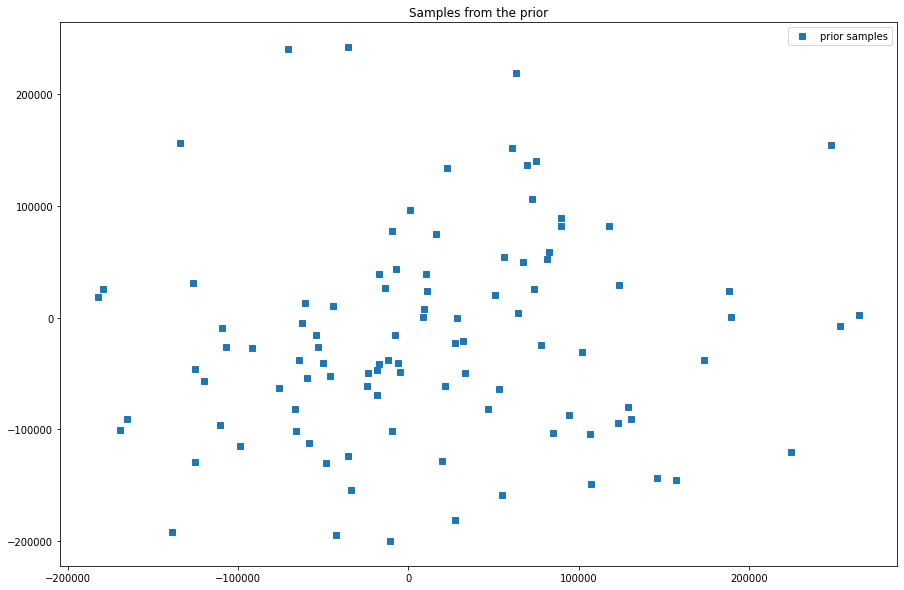

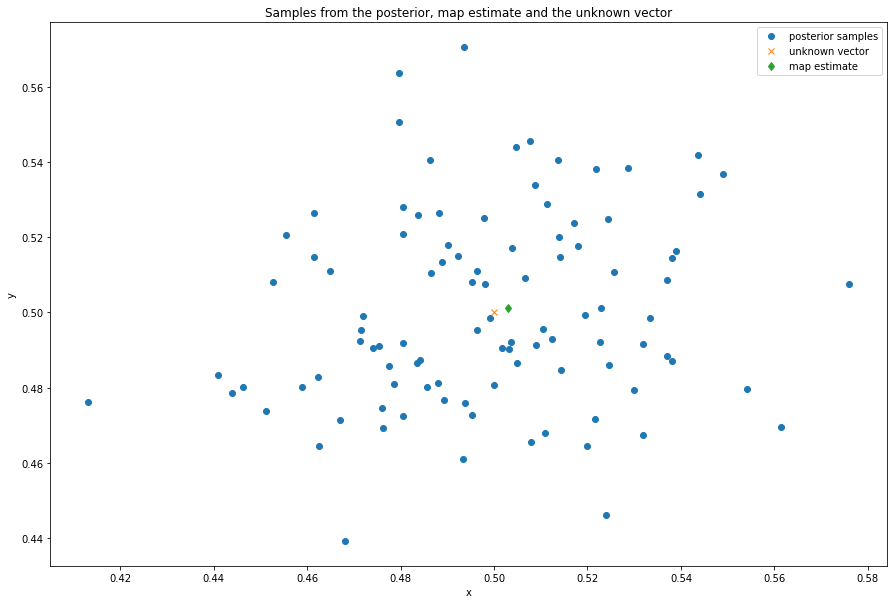

In [8]:
posterior_sample_size = 100
# samples are drawn from the posterior distribution and they are plotted
x_post, y_post = rng.multivariate_normal(mean=np.squeeze(mu_post, axis=1), cov=cov_post, size=posterior_sample_size, check_valid='warn').T

prior_sample_size = 100
# samples are drawn from the posterior distribution and they are plotted
x_prior, y_prior = rng.multivariate_normal(mean=np.squeeze(mu_x, axis=1), cov=sigma_x, size=posterior_sample_size, check_valid='warn').T

fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(x_prior, y_prior, 's', label='prior samples')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Samples from the prior')

fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(x_post, y_post, 'o', label='posterior samples')
_ = ax.plot(x_x, y_x, 'x', label='unknown vector')
_ = ax.plot(mu_post[0, 0], mu_post[1, 0], 'd', label='map estimate')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Samples from the posterior, map estimate and the unknown vector')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

Despite the uninformative prior whose samples are very far away from the unknown vector x, the posterior samples are very close to the unknown vector as can be seen from the above two figures.

## References
[1] Machine Learning A Probabilistic Perspective, Kevin P. Murphy.

[2] Inferring An Unknown Vector Using Noisy Measurements From Multiple Devices, <https://saffetgokcensen.github.io/blog/2020/08/13/inferring-an-unknown-vector-using-noisy-measurements-from-multiple-devices>